In [ ]:
import numpy as np
import matplotlib.pyplot as plt


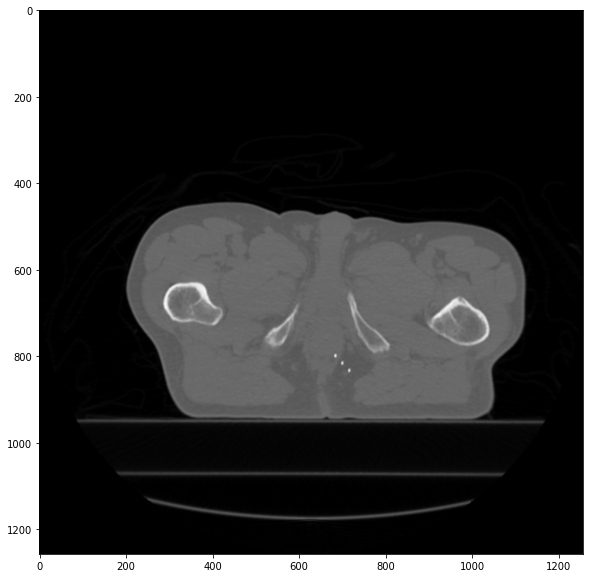

In [ ]:
data05 = np.load("/home/user022/projects/def-sponsor00/data/train/005/images/005.npy")
f0 = data05[:,:, 10]
fig = plt.figure(figsize=(10,10))
plt.imshow(f0, cmap='gray')

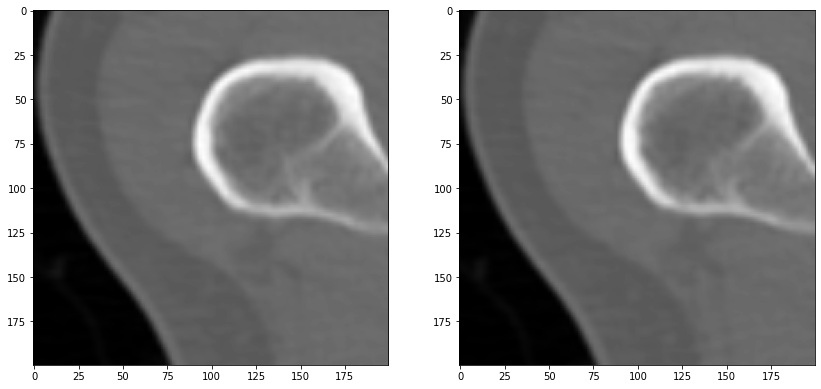

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,8))
ax1.imshow(data05[600:800,200:400, 18], cmap='gray')
ax2.imshow(data05[600:800,200:400, 20], cmap='gray')

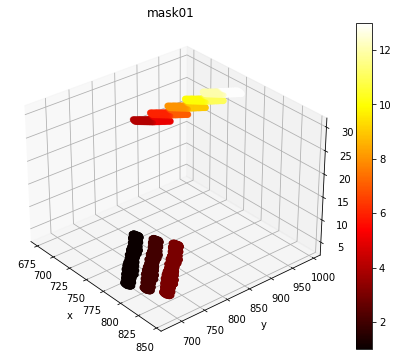

In [ ]:
x_lenghth = mask01[:,:,:].shape[0]
y_lenghth = mask01[:,:,:].shape[1]
z_lenghth = mask01[:,:,:].shape[2]
x = []
y = [] 
z = []
p = []
for i in range(x_lenghth):
    for j in range(y_lenghth):
        for k in range(z_lenghth):
            if mask01[i,j,k] != 0:
                p.append([i,j,k])
                #x.append(i)
                #y.append(j)
                #z.append(k)

p = np.concatenate(list(zip(np.where(mask01>0)))).T


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')                
img = ax.scatter(p[:,0], p[:,1], p[:,2], c=mask01[p[:,0],p[:,1], p[:,2]], cmap=plt.hot())
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("mask01")
ax.view_init(30, 320)
fig.colorbar(img)
plt.show()

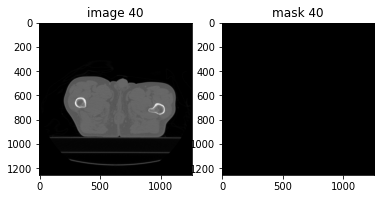

In [ ]:
import os
from decimal import *
getcontext().prec = 3
#os.makedirs("img")
fram_num = data01.shape[2]

for i in range(fram_num):
  plt.subplot(121)
  plt.imshow(data01[:,:, i], cmap='gray')
  plt.title("image "+ str(i))
  plt.subplot(122)
  plt.imshow(mask01[:,:, i], cmap='gray')
  plt.title("mask "+ str(i))
  plt.savefig("img/img"+str(i), dpi=200)#,box_inches="tight"



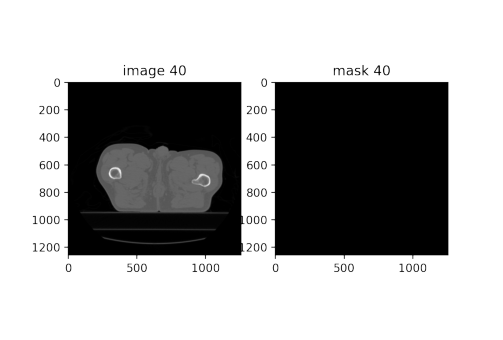

In [ ]:
import matplotlib.cm as cm
import matplotlib.animation as animation
img_set = []
frames = [] # for storing the generated images
fig = plt.figure(figsize=(11,6))
plt.axis('off')
for i in range(fram_num):
  img_set.append(plt.imread("img/img"+str(i)+".png"))

for i in range(fram_num):
    frames.append([plt.imshow(img_set[i], cmap=cm.Greys_r,animated=True,aspect='equal')])

ani = animation.ArtistAnimation(fig, frames, interval=500, blit=True)#repeat_delay=5000
ani.save('movie.mp4')